## TechLabs project02, in collab with MGH

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import the data & first look
df = pd.read_excel('ModelDataAnonShared.xlsx');
airport_traffic = pd.read_excel('ModelDataAnonShared.xlsx',sheet_name='airport_traffic');
df.head()

,CDateNum,CWeekNum,NumO1,NumO2,NumO3,NumO4,NumR1,NumR2,NumR3,NumR4,...,NumC3,NumC4,NumSF1,NumSF2,NumSF3,NumSF4,CFuture1,CFuture2,CFuture3,CFuture4
0,-524,-74,0,1,1,1,0,0,0,0,...,205,198,382,805,1238,2027,796,1697,3781,7296
1,-521,-74,64,70,95,134,4,9,14,22,...,370,375,489,887,1408,2067,915,1819,3699,7485
2,-520,-74,55,77,104,143,4,8,23,26,...,569,575,484,952,1414,2153,936,1961,3945,8053
3,-519,-74,59,92,102,140,4,6,14,22,...,742,773,536,917,1489,2107,916,1852,3860,7824
4,-518,-74,49,79,92,145,7,9,18,27,...,941,961,551,1002,1574,2228,968,1940,3882,7934


In [ ]:
print('Shape: ', df.shape) # -> 449 x 30
print(df.info()) # -> all int64 and no NaNs
df.describe() # summary stats

Shape:  (449, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   CDateNum  449 non-null    int64
 1   CWeekNum  449 non-null    int64
 2   NumO1     449 non-null    int64
 3   NumO2     449 non-null    int64
 4   NumO3     449 non-null    int64
 5   NumO4     449 non-null    int64
 6   NumR1     449 non-null    int64
 7   NumR2     449 non-null    int64
 8   NumR3     449 non-null    int64
 9   NumR4     449 non-null    int64
 10  NumSA1    449 non-null    int64
 11  NumSA2    449 non-null    int64
 12  NumSA3    449 non-null    int64
 13  NumSA4    449 non-null    int64
 14  NumS1     449 non-null    int64
 15  NumS2     449 non-null    int64
 16  NumS3     449 non-null    int64
 17  NumS4     449 non-null    int64
 18  NumC1     449 non-null    int64
 19  NumC2     449 non-null    int64
 20  NumC3     449 non-null    int64
 21  NumC4     449 non-nul

,CDateNum,CWeekNum,NumO1,NumO2,NumO3,NumO4,NumR1,NumR2,NumR3,NumR4,...,NumC3,NumC4,NumSF1,NumSF2,NumSF3,NumSF4,CFuture1,CFuture2,CFuture3,CFuture4
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,...,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,-205.483296,-29.202673,41.939866,77.391982,101.026726,127.739421,4.407572,14.922049,21.563474,28.792873,...,1961.928731,3876.610245,569.826281,967.563474,1531.180401,2291.452116,977.859688,1945.354120,3841.610245,7522.775056
std,184.048568,26.088900,18.013845,27.544648,35.515392,43.641409,2.694411,5.872201,7.876905,10.003541,...,556.376458,1105.573143,172.292101,291.208115,461.366634,699.435422,290.027932,568.582598,1137.721461,2363.957380
min,-524.000000,-74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,205.000000,198.000000,20.000000,62.000000,172.000000,371.000000,0.000000,0.000000,0.000000,0.000000
25%,-361.000000,-51.000000,33.000000,67.000000,91.000000,120.000000,3.000000,11.000000,17.000000,24.000000,...,1844.000000,3764.000000,522.000000,878.000000,1397.000000,2033.000000,871.000000,1823.000000,3662.000000,7170.000000
50%,-207.000000,-29.000000,45.000000,85.000000,111.000000,141.000000,4.000000,15.000000,23.000000,30.000000,...,2143.000000,4308.000000,606.000000,1042.000000,1669.000000,2497.000000,1071.000000,2131.000000,4273.000000,8556.000000
75%,-45.000000,-6.000000,54.000000,96.000000,125.000000,156.000000,6.000000,19.000000,27.000000,35.000000,...,2327.000000,4587.000000,696.000000,1169.000000,1833.000000,2711.000000,1183.000000,2334.000000,4580.000000,9120.000000
max,112.000000,16.000000,85.000000,133.000000,169.000000,200.000000,16.000000,33.000000,45.000000,53.000000,...,2660.000000,5081.000000,792.000000,1397.000000,2348.000000,3776.000000,1340.000000,2645.000000,5102.000000,9970.000000


# Visualization

<Axes: xlabel='CDateNum'>

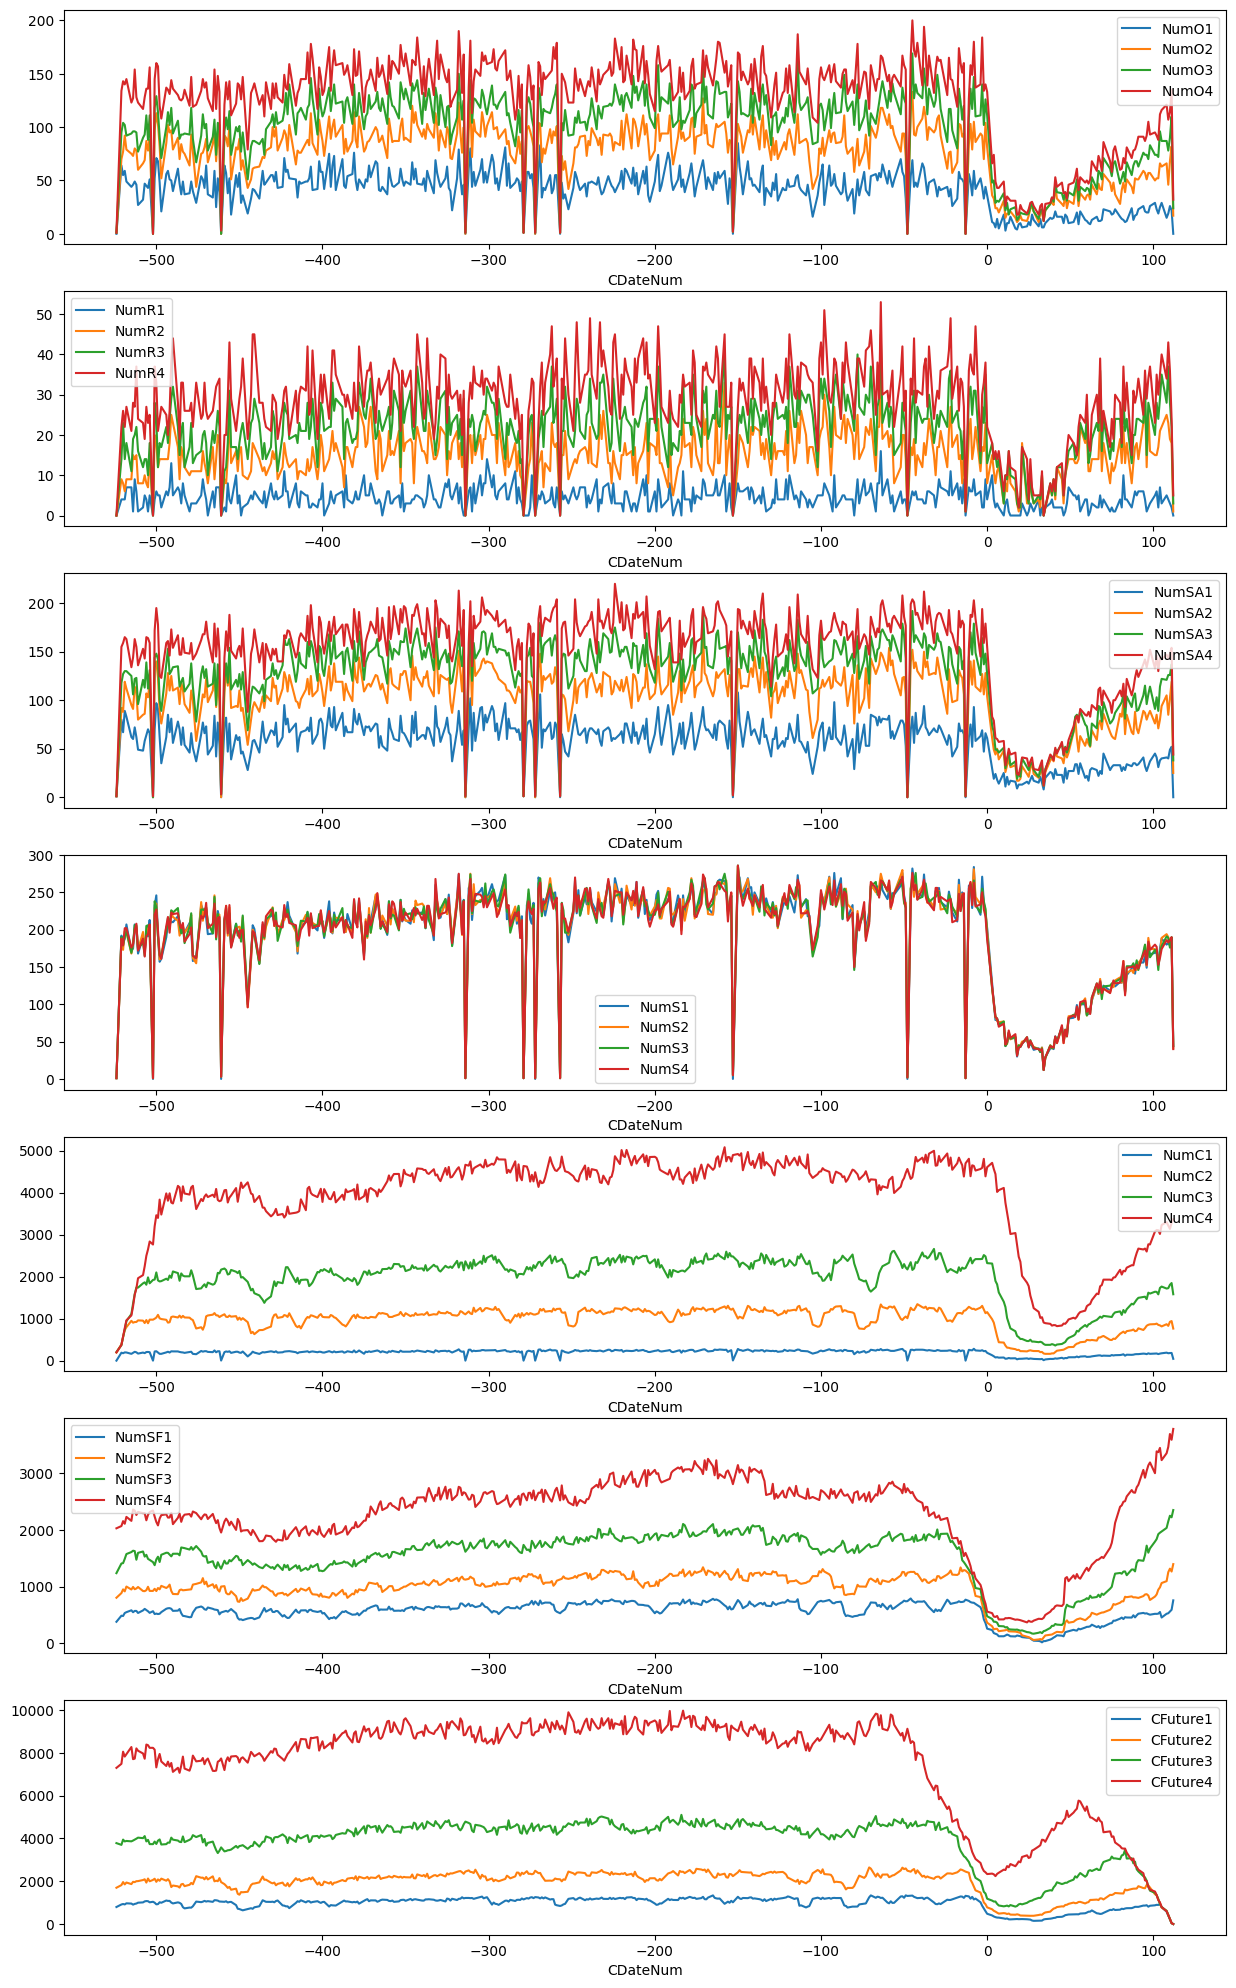

In [ ]:
fig, axes = plt.subplots(7,1,figsize=(15,25));
df.plot(ax=axes[0], x='CDateNum', y=['NumO1','NumO2','NumO3','NumO4'])
df.plot(ax=axes[1], x='CDateNum', y=['NumR1','NumR2','NumR3','NumR4'])
df.plot(ax=axes[2], x='CDateNum', y=['NumSA1','NumSA2','NumSA3','NumSA4'])
df.plot(ax=axes[3], x='CDateNum', y=['NumS1','NumS2','NumS3','NumS4'])
df.plot(ax=axes[4], x='CDateNum', y=['NumC1','NumC2','NumC3','NumC4'])
df.plot(ax=axes[5], x='CDateNum', y=['NumSF1','NumSF2','NumSF3','NumSF4'])
df.plot(ax=axes[6], x='CDateNum', y=['CFuture1','CFuture2','CFuture3','CFuture4'])
#fig.savefig('lineplots.pdf')

#Feature engineering

In [ ]:
# Datetime, extract month and year
date_0 = pd.to_datetime('2020-03-13');
df_days_orig = df['CDateNum'];
df_days_num = [np.int(i) for i in df_days_orig]
df_dates = []
for i,day in enumerate(df_days_num):
    df_dates.append(date_0 + timedelta(days=day))
df['dates'] = df_dates
df['month'] = pd.DatetimeIndex(df['dates']).month
df['year'] = pd.DatetimeIndex(df['dates']).year

In [ ]:
# engineer feature: airport traffic (Logan airport) - passengers per month - inbound & outbound
at_dates = airport_traffic['month']

df['at_inbound'] = np.nan
df['at_outbound'] = np.nan
for i, ts in enumerate(at_dates):
    month = ts.month
    year = ts.year
    df_sel = df[df['month'] == month]
    df_sel = df_sel[df_sel['year'] == year]
    df['at_inbound'][df_sel.index] = airport_traffic.loc[i]['inbound'];
    df['at_outbound'][df_sel.index] = airport_traffic.loc[i]['outbound'];

<Axes: title={'center': 'at_outbound'}, xlabel='month'>

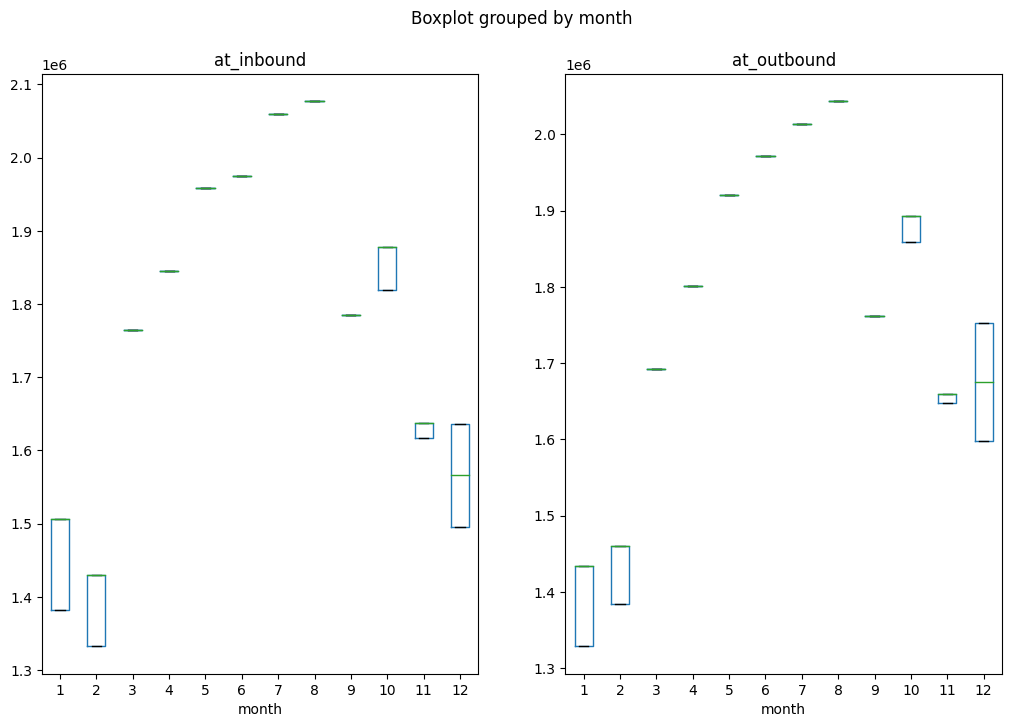

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
df.boxplot(column = 'at_inbound', by = 'month', ax=ax[0], grid = False)
df.boxplot(column = 'at_outbound', by = 'month', ax=ax[1], grid = False)

<Axes: xlabel='CDateNum'>

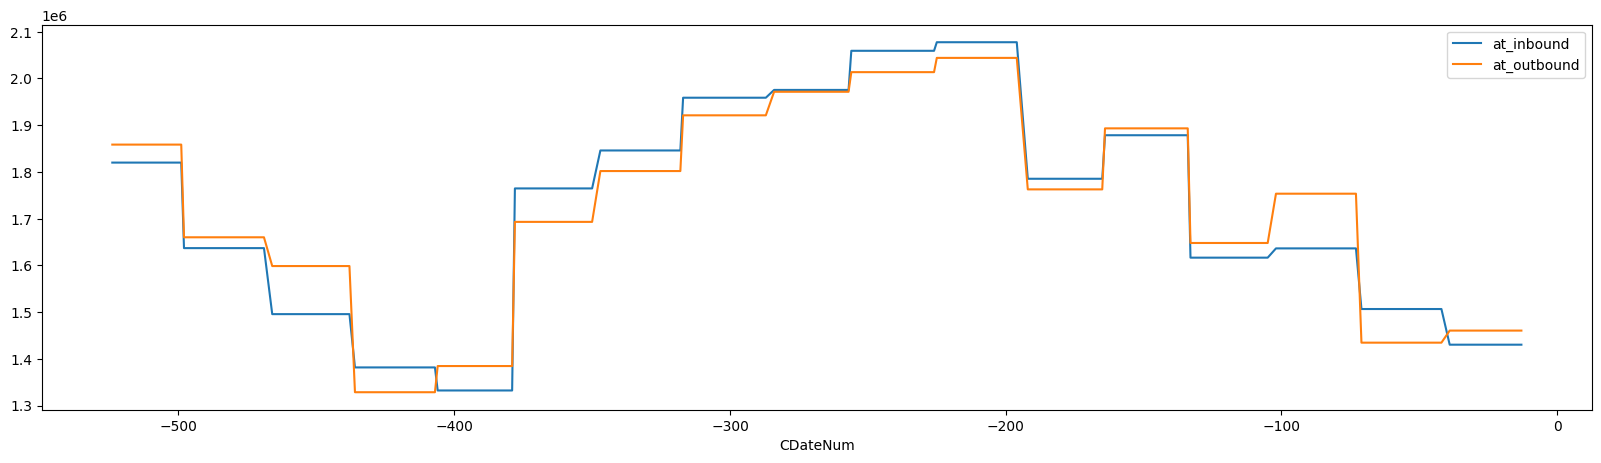

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
df.plot(ax=ax, x='CDateNum', y=['at_inbound','at_outbound'])

In [ ]:
# Feature marathon (set to 1, on 15-04-2019)
marathon = '2019-04-15'
df['marathon'] = 0
df['marathon'][df[df['dates'] == marathon].index] = 1
print(df[df['dates'] == '2019-04-15']) # check

     CDateNum  CWeekNum  NumO1  NumO2  NumO3  NumO4  NumR1  NumR2  NumR3  \
132      -333       -47     38     90    104    130      4     14     20   

     NumR4  ...  CFuture1  CFuture2  CFuture3  CFuture4      dates  month  \
132     19  ...      1136      2274      4574      8877 2019-04-15      4   

     year  at_inbound  at_outbound  marathon  
132  2019   1845657.0    1801619.0         1  

[1 rows x 36 columns]


In [ ]:
# save data with added features
df.to_excel('ModelData_airport-features.xlsx',sheet_name='ModelData_plus_features')

#Linear Regression

     CDateNum  CWeekNum  NumO1  NumO2  NumO3  NumO4  NumR1  NumR2  NumR3  \
335       -46        -6     54    115    121    165      4     17     23   
336       -45        -6     69    133    169    200      6     15     28   
337       -44        -6     44     93    127    172      5     19     31   
338       -43        -6     48     92    140    166      6     10     18   
339       -42        -6     44    100    132    179      4     15     27   

     NumR4  ...  CFuture1  CFuture2  CFuture3  CFuture4      dates  month  \
335     34  ...      1327      2446      4723      8453 2020-01-27      1   
336     30  ...      1330      2522      4575      8541 2020-01-28      1   
337     44  ...      1271      2571      4667      8473 2020-01-29      1   
338     28  ...      1239      2365      4796      7663 2020-01-30      1   
339     31  ...      1210      2510      4563      8023 2020-01-31      1   

     year  at_inbound  at_outbound  marathon  
335  2020   1506471.0    1434514.

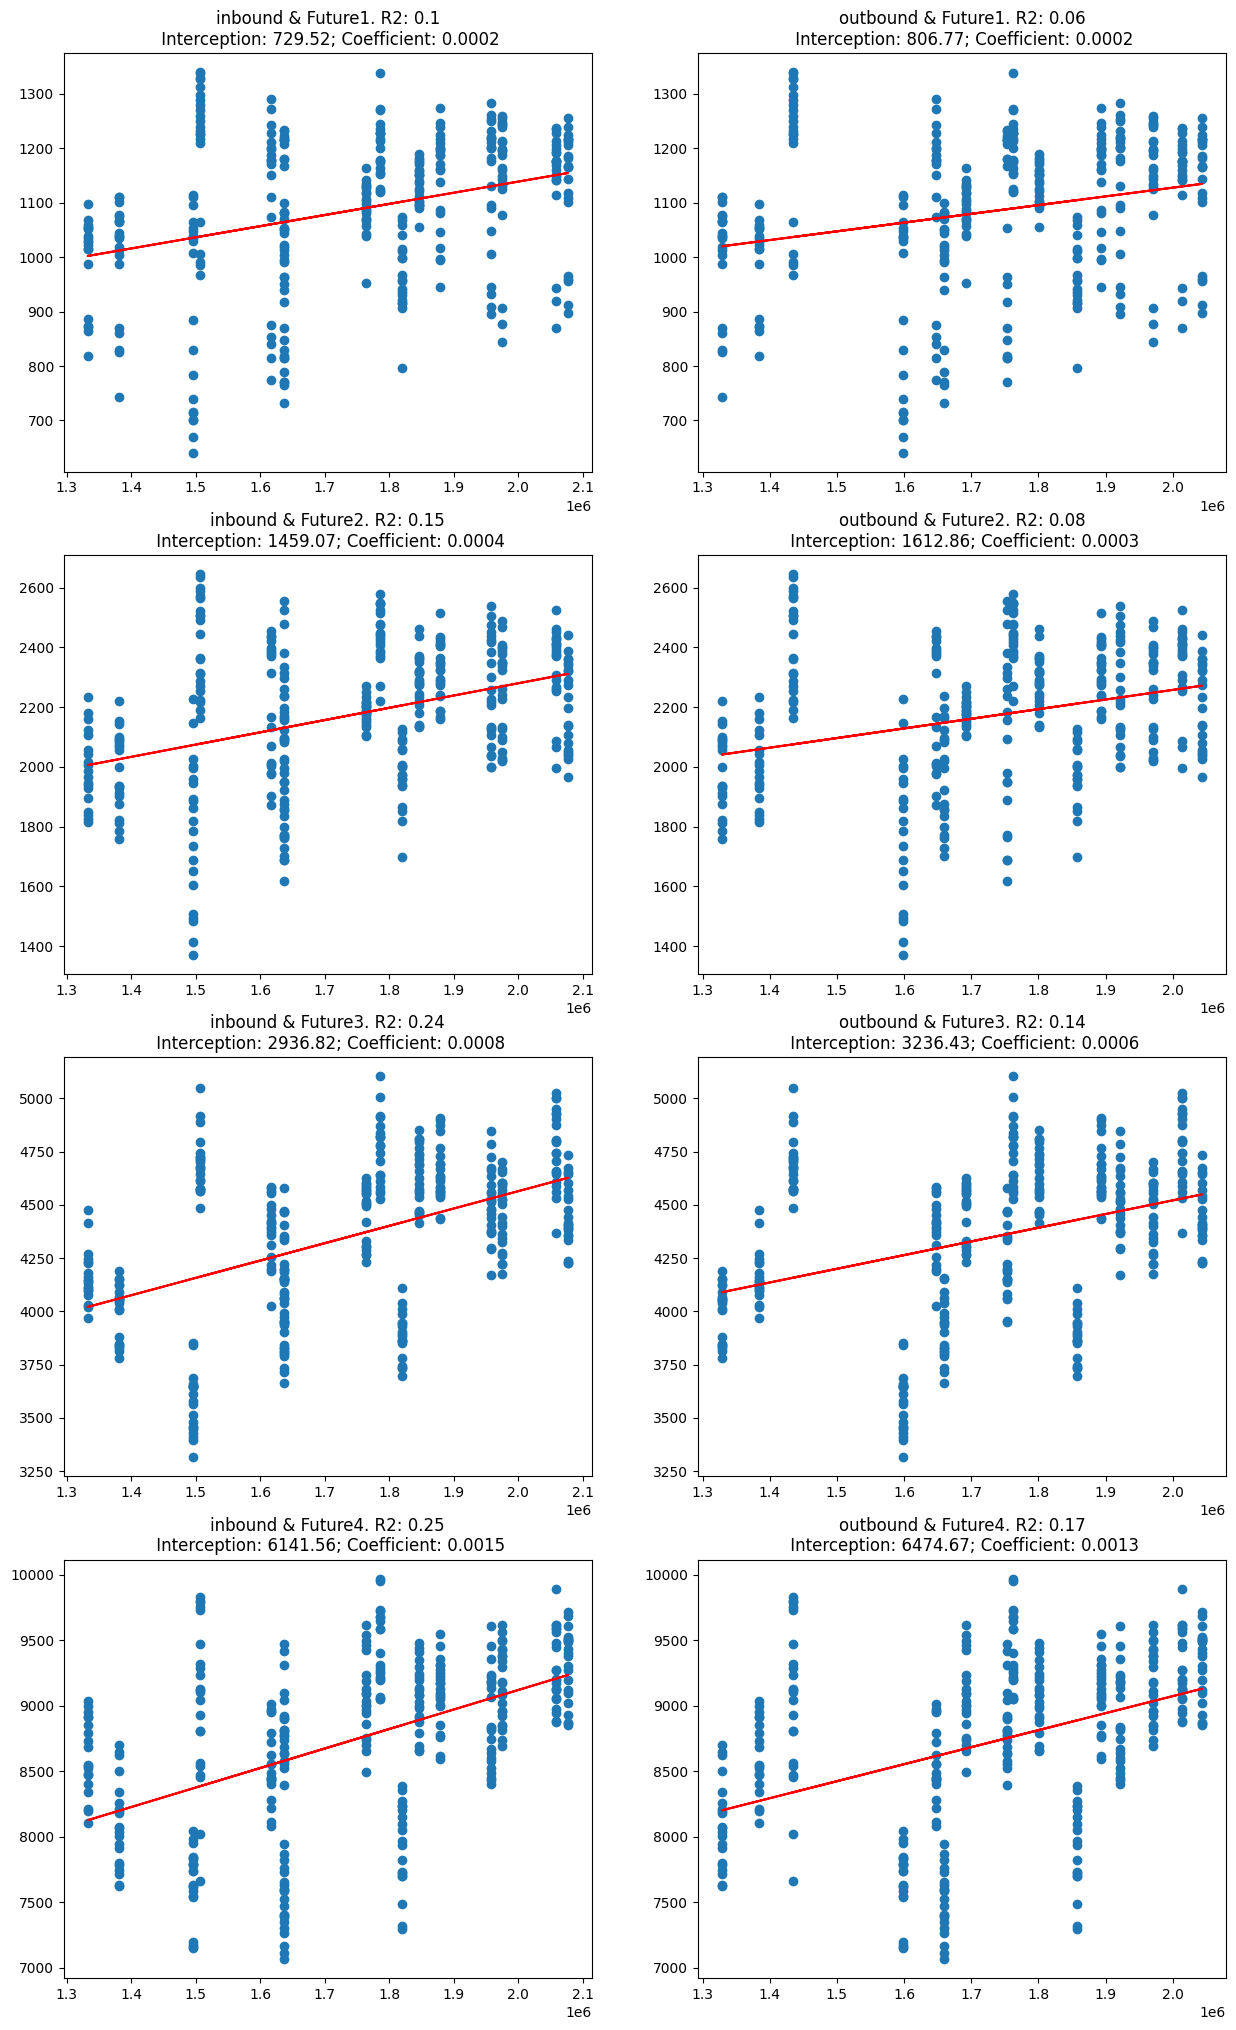

In [ ]:
# Linear regression inbound and outbound passengers with Future 1,2,3,4
# train data: before march 2020
df_train = df[df['dates'] < '2020-02-01']
print(df_train.tail())

# Create X and Y, compatible with sklearn (np array)
X_inbound = df_train.at_inbound.values.reshape(-1, 1)  # inbound passengers
X_outbound = df_train.at_outbound.values.reshape(-1, 1)  # outbound passengers
Y1 = df_train.CFuture1.values.reshape(-1,1) # future 1
Y2 = df_train.CFuture2.values.reshape(-1,1) # future 2
Y3 = df_train.CFuture3.values.reshape(-1,1) # future 3
Y4 = df_train.CFuture4.values.reshape(-1,1) # future 4
X = [X_inbound, X_outbound]; # Vars to loop over
X_names = ['inbound','outbound']
Y = [Y1, Y2, Y3, Y4]
Y_names = ['Future1','Future2','Future3','Future4']

linear_regressor = LinearRegression()  # create LR

r2 = np.zeros((np.shape(X)[0],np.shape(Y)[0])) # empty vars
Y_pred = []

fig, axes = plt.subplots(4,2,figsize=(15,25));
ax=0
for ix, x in enumerate(X):
  for iy, y in enumerate(Y):
    linear_regressor.fit(x,y)  # fit the model
    Y_pred = linear_regressor.predict(x)  # predict
    r2[ix,iy] = metrics.r2_score(y, Y_pred) # R2 score
    print(X_names[ix]+' & '+Y_names[iy]+ '. R2 score is: ', round(r2[ix,iy],2))

    axes[iy,ix].scatter(x, y)
    axes[iy,ix].plot(x, Y_pred, color='red')
    coeff = np.array2string(round(linear_regressor.coef_[0][0], 4))
    intercept = np.array2string(round(linear_regressor.intercept_[0], 2))
    title = str(X_names[ix]+' & '+Y_names[iy]+ '. R2: '+ str(round(r2[ix,iy],2)) + '\n Interception: ' + intercept + '; Coefficient: ' + coeff)
    axes[iy,ix].set_title(title)
    ax=+1
#fig.savefig('Airport-traffic_LinearRegression-untilFeb20.pdf') # save figure

########## NOTE: ~14^6 passengers corresponds to February 2020, when the Covid outbreak already started

Marathon & Future1. R2 score is:  0.00036340802236844993
Marathon & Future2. R2 score is:  0.0005256536547271207
Marathon & Future3. R2 score is:  0.0010389349511042978
Marathon & Future4. R2 score is:  0.00013142816598465945


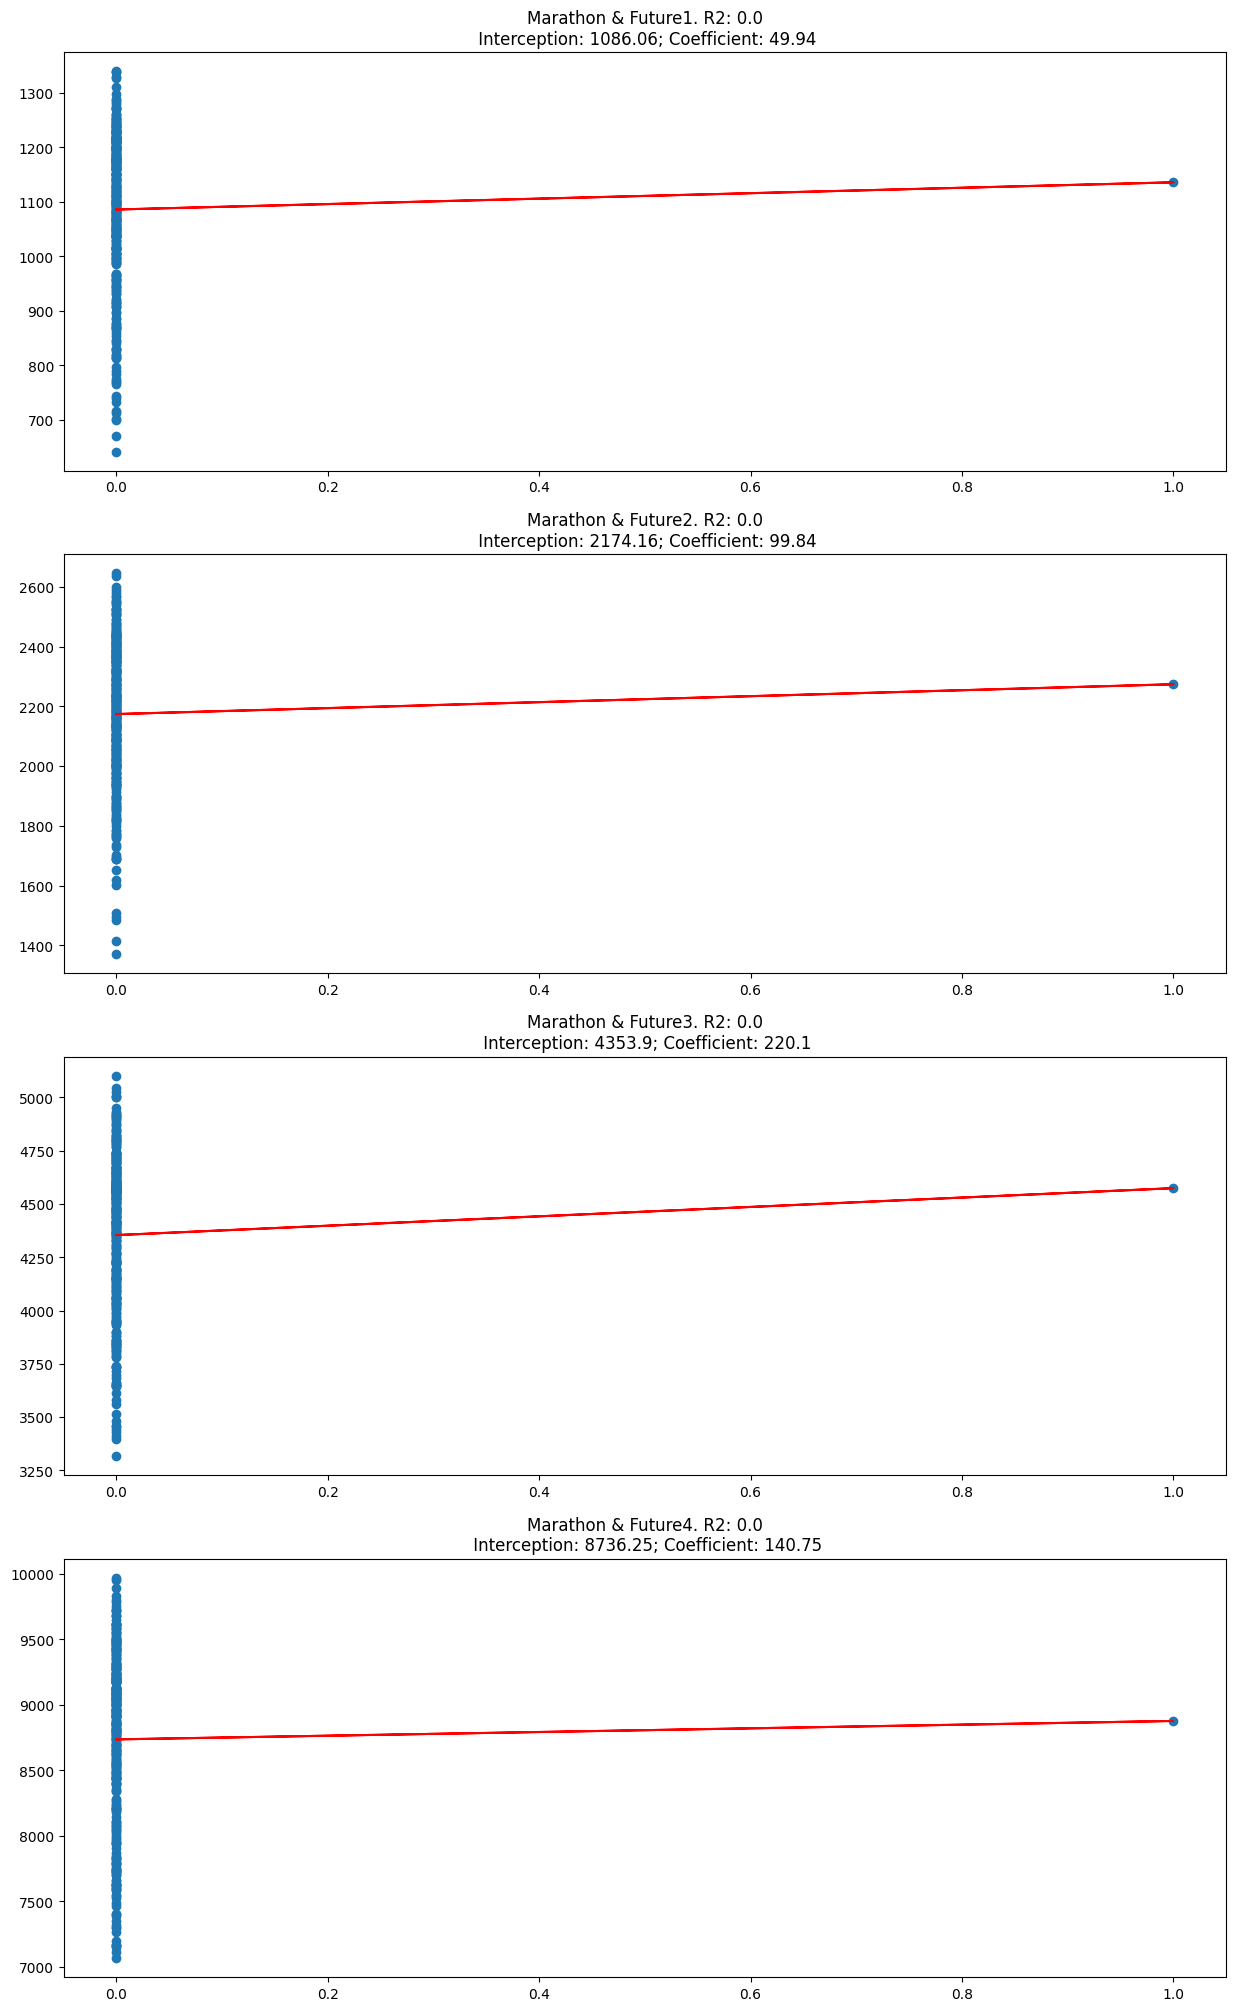

In [ ]:
# Linear regression marathon date
x = df_train.marathon.values.reshape(-1, 1) # format X

fig, axes = plt.subplots(4,figsize=(15,25));
for iy, y in enumerate(Y):
  linear_regressor.fit(x,y)  # fit the model
  Y_pred = linear_regressor.predict(x)  # predict
  r2 = metrics.r2_score(y, Y_pred) # R2 score
  print('Marathon'+' & '+Y_names[iy]+ '. R2 score is: ', r2)

  axes[iy].scatter(x, y)
  axes[iy].plot(x, Y_pred, color='red')
  coeff = np.array2string(round(linear_regressor.coef_[0][0], 2))
  intercept = np.array2string(round(linear_regressor.intercept_[0], 2))
  title = str('Marathon & '+Y_names[iy]+ '. R2: '+ str(round(r2,2)) + '\n Interception: ' + intercept + '; Coefficient: ' + coeff)
  axes[iy].set_title(title)
  ax=+1
#fig.savefig('Marathon_LinearRegression.pdf') # save figure